In [1]:
from sklearn.cluster import KMeans
from mr_toolkit.clustering import StratifiedClusters
import numpy as np
import matplotlib.pyplot as plt

# Stratified Clustering Demo

Stratified clustering is like a hierarchical k-means clustering. A set of bins are defined, and k-means is independently performed in each bin.

We're going demonstrate this by taking a dataset and splitting it up into 6 clusters.

First, we'll cluster it with standard k-means.

Then, we'll stratify in both x and y. We'll define 2 stratum boundaries, which makes 3 strata.

## Create some sample data

In [2]:
colors = np.array(['tab:red', 'tab:orange', 'tab:cyan', 'tab:blue', 'tab:pink', 'tab:purple'])

# Number of clusters to place in each stratum
n_clusters = 2

In [3]:
sample_data = np.array([
    [3.0, 23],
    [3.5, 27],
    [4.5, 87],
    [6.0, 14],
    [6.2, 8],
    [5.3, 91],
    [8.4, 33],
    [8.7, 32],
    [8.9, 80],
])

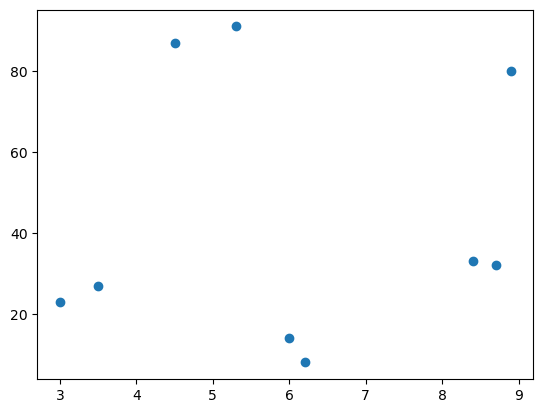

In [4]:
plt.scatter(*sample_data.T)

## Standard K-means clustering

In [5]:
kmeans = KMeans(n_clusters=n_clusters*3, n_init='auto')
cluster_assignments = kmeans.fit_predict(sample_data)

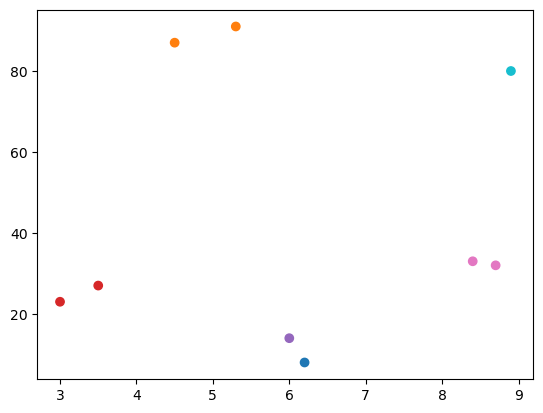

In [6]:
plt.scatter(*sample_data.T, color=colors[cluster_assignments])

## Stratify on the first dimension

In [7]:
vertical_bounds = np.array([5, 7])

clusterer = StratifiedClusters(n_clusters, bin_bounds=vertical_bounds)

In [8]:
clusterer.fit(sample_data, coord_to_stratify=0)

  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
vertical_assignments = clusterer.predict(sample_data)
vertical_assignments

  0%|          | 0/3 [00:00<?, ?it/s]

array([0, 0, 1, 2, 2, 3, 5, 5, 4])

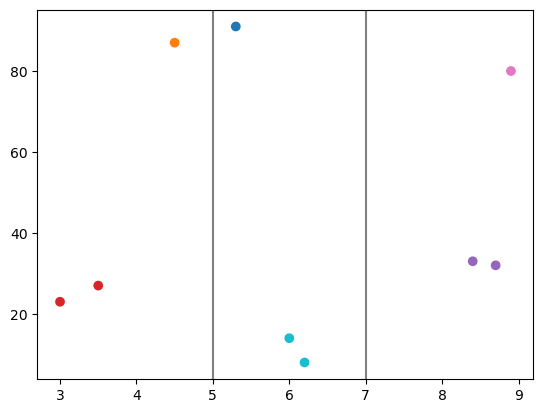

In [10]:
plt.scatter(*sample_data.T, color=colors[vertical_assignments])

for bound in vertical_bounds:
    plt.axvline(bound, color='gray')

## Stratify on the second dimension

In [11]:
horizontal_bounds = np.array([25, 50])

clusterer = StratifiedClusters(n_clusters, bin_bounds=horizontal_bounds)

In [12]:
clusterer.fit(sample_data, coord_to_stratify=1)

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
horizontal_assignments = clusterer.predict(sample_data)
horizontal_assignments

  0%|          | 0/3 [00:00<?, ?it/s]

array([0, 3, 4, 1, 1, 4, 2, 2, 5])

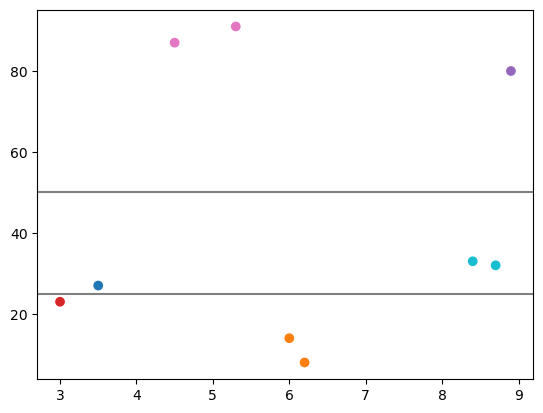

In [14]:
plt.scatter(*sample_data.T, color=colors[horizontal_assignments])

for bound in horizontal_bounds:
    plt.axhline(bound, color='gray')

## Compare all

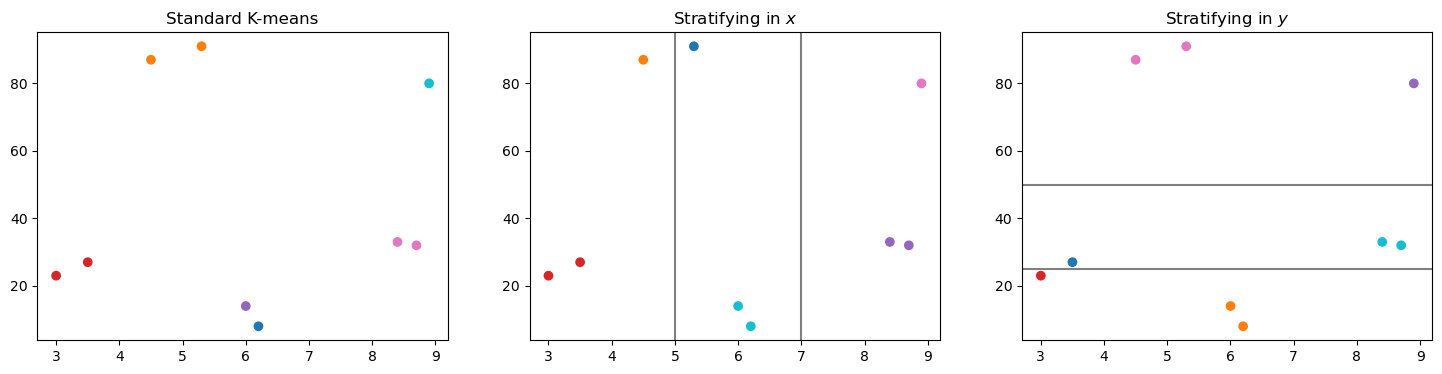

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,4))


axs[0].set_title("Standard K-means")
axs[0].scatter(*sample_data.T, color=colors[cluster_assignments])


axs[1].set_title("Stratifying in $x$")
axs[1].scatter(*sample_data.T, color=colors[vertical_assignments])
for bound in vertical_bounds:
    axs[1].axvline(bound, color='gray')
    
    
axs[2].set_title("Stratifying in $y$")
axs[2].scatter(*sample_data.T, color=colors[horizontal_assignments])
for bound in horizontal_bounds:
    axs[2].axhline(bound, color='gray')